In [1]:
import matplotlib.pyplot as plt
from subprocess import run, PIPE
from shutil import copyfileobj
import numpy as np

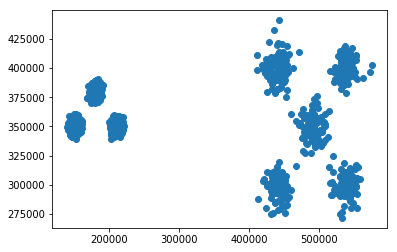

In [2]:
datasetPath = '../datasets/unbalance.txt'
executablePath = '../../clustering_time'
mstModeRange = ['Prim', 'Kruskal', 'KruskalCompressed']
inconsistencyModeRange = ['Factor']
neighborhoodDepthRange = ['5']
inconsistencyParameterRange = ['0.5']
repeats = 10
X = []
Y = []
with open(datasetPath) as fin:
    pointsNumber = int(fin.readline())
    for i in range(pointsNumber):
        line = fin.readline()
        positions = line.split()
        X.append(float(positions[0]))
        Y.append(float(positions[1]))
plt.scatter(X, Y)
plt.show()

In [3]:
datasetSlices = 10
datasetPointsRange = [x*pointsNumber//datasetSlices for x in range(1, datasetSlices+1)]
for points in datasetPointsRange:
    with open(datasetPath) as from_file:
        line = from_file.readline()
        line = line.replace(str(pointsNumber), str(points))
        to_file = open('../datasets/time_{0}.txt'.format(points), mode="w")
        to_file.write(line)
        copyfileobj(from_file, to_file)
        to_file.flush()

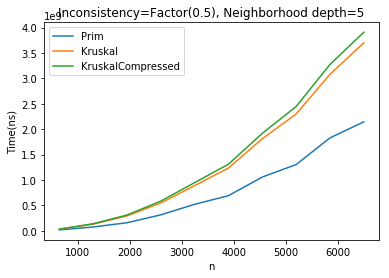

In [4]:
for inconsistencyMode in inconsistencyModeRange:
    for neighborhoodDepth in neighborhoodDepthRange:
        for inconsistencyParameter in inconsistencyParameterRange:
            repeat_times = {}
            for mstMode in mstModeRange:
                mst_repeat_times = []
                for repeat in range(repeats):
                    times = []
                    for points in datasetPointsRange:
                        with open('../datasets/time_{0}.txt'.format(points)) as fin:
                            output = run([executablePath, mstMode, inconsistencyMode, neighborhoodDepth, inconsistencyParameter], check=True, text=True, stdin=fin, stdout=PIPE).stdout
                        times.append(int(output.split()[0]))
                    mst_repeat_times.append(times)
                repeat_times[mstMode] = mst_repeat_times
            for mstMode in mstModeRange:
                mean_times = np.mean(repeat_times[mstMode], axis=0)
                plt.plot(datasetPointsRange, mean_times)
            plt.xlabel('n')
            plt.ylabel('Time(ns)')
            plt.legend(mstModeRange)
            plt.title('Inconsistency={0}({2}), Neighborhood depth={1}'.format(inconsistencyMode, neighborhoodDepth, inconsistencyParameter))
            plt.show()